<b>34. Вычислить несколько первых коэффициентов Фурье для функции $x = x(t)$ по указанной системе ортогональных многочленов. Подтвердить графически сходимость ряда Фурье к функции $x$.</b>

$x(t) = |t|$, многочлены Эрмита

Многочлены Эрмита образуют ортогональный (после нормировки – ортонормированный) базис в гильбертовом пространстве  $L^{2, \xi}(-\infty, +\infty), \xi(t) = e^{-t}$.

In [1]:
import sympy as sp
from IPython.display import display

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')

x = sp.Abs(t)
xi = sp.exp(-t**2)
a = -sp.oo
b = sp.oo

monomial_system = []
for i in range(11):
    monomial_system.append(t**i)
    
display(monomial_system)

⎡       2   3   4   5   6   7   8   9   10⎤
⎣1, t, t , t , t , t , t , t , t , t , t  ⎦

In [2]:
def scal(x, y):
    return sp.integrate(x*y*xi, (t, a, b))

def get_sum(i, orthogonal_system, base_system):
    sum = 0
    for j in range(i):
        sum += ((scal(base_system[i + 1], orthogonal_system[j]))
                *(orthogonal_system[j])/(scal(orthogonal_system[j], orthogonal_system[j])))
        
    return sum

In [3]:
permite_polynomials = [monomial_system[0]]

for i in range(1, 11):
    permite_polynomials.append(monomial_system[i] - get_sum(i - 1, permite_polynomials, monomial_system))
    
display(permite_polynomials)

⎡                                                                  4       2  
⎢       2   1   3   3⋅t   4      2   3   5      3   15⋅t   6   15⋅t    45⋅t   
⎢1, t, t  - ─, t  - ───, t  - 3⋅t  + ─, t  - 5⋅t  + ────, t  - ───── + ───── -
⎣           2        2               4               4           2       4    

              5        3                            4        2                
 15   7   21⋅t    105⋅t    105⋅t   8       6   105⋅t    105⋅t    105   9      
 ──, t  - ───── + ────── - ─────, t  - 14⋅t  + ────── - ────── + ───, t  - 18⋅
 8          2       4        8                   2        2       16          

          5        3                    8        6         4         2      ⎤
 7   189⋅t    315⋅t    945⋅t   10   45⋅t    315⋅t    1575⋅t    4725⋅t    945⎥
t  + ────── - ────── + ─────, t   - ───── + ────── - ─────── + ─────── - ───⎥
       2        2        16           2       2         4         16      32⎦

Далее вычислим коэффициенты Фурье для функции $x$:

In [4]:
fourier_coefficients = []

for i in range(11):
    fourier_coefficients.append(sp.integrate(x*permite_polynomials[i]*xi, (t, a, b)))
        
display(fourier_coefficients)

⎡                               -15      105⎤
⎢1, 0, 1/2, 0, -1/4, 0, 3/8, 0, ────, 0, ───⎥
⎣                                16       32⎦

Значения полученных коэффициентов стремятся к нулю. Это является необходимым признаком, что они вычислены правильно.

Вычислим частичные суммы ряда Фурье.

In [5]:
partial_amounts = []

for i in range(10):
    sum = 0
    for j in range(i + 1):
        sum += fourier_coefficients[j]*permite_polynomials[j]
    partial_amounts.append(sum)
    
display(partial_amounts)

⎡       2       2         4      2          4      2          6       4       
⎢      t    3  t    3    t    5⋅t    9     t    5⋅t    9   3⋅t    49⋅t    175⋅
⎢1, 1, ── + ─, ── + ─, - ── + ──── + ──, - ── + ──── + ──, ──── - ───── + ────
⎣      2    4  2    4    4     4     16    4     4     16   8       16      32

 2          6       4        2             8       6         4        2       
t    9   3⋅t    49⋅t    175⋅t    9     15⋅t    27⋅t    1673⋅t    875⋅t    1611
── - ──, ──── - ───── + ────── - ──, - ───── + ───── - ─────── + ────── - ────
     64   8       16      32     64      16      2        32       16     256 

        8       6         4        2       ⎤
    15⋅t    27⋅t    1673⋅t    875⋅t    1611⎥
, - ───── + ───── - ─────── + ────── - ────⎥
      16      2        32       16     256 ⎦

Покажем сходимость на примере трех частичных сумм.

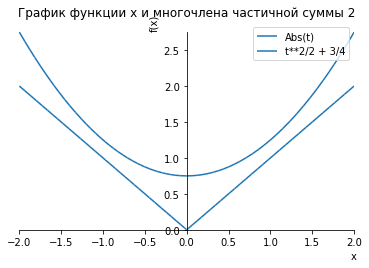

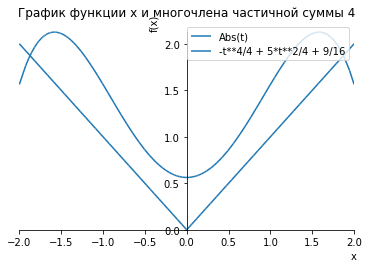

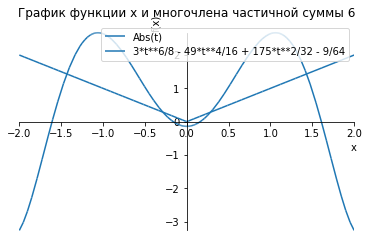

In [6]:
left_border = -2
right_border = 2

sp.plot((x, (t, left_border, right_border)),
        (partial_amounts[2], (t, left_border, right_border)), 
        legend=True,
        title='График функции x и многочлена частичной суммы 2')
sp.plot((x, (t, left_border, right_border)),
        (partial_amounts[4], (t, left_border, right_border)), 
        legend=True,
        title='График функции x и многочлена частичной суммы 4')
sp.plot((x, (t, left_border, right_border)),
        (partial_amounts[6], (t, left_border, right_border)), 
        legend=True,
        title='График функции x и многочлена частичной суммы 6')